In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe=pd.read_csv("D:\\downloads\\archive (15).zip")
dataframe=dataframe.drop('id', axis=1)

In [3]:
dataframe

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
dataframe.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
dataframe.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
dataframe.skew()

C:\Users\DELL-G5\AppData\Local\Temp\ipykernel_16480\194550592.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe.skew()


age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

In [7]:
dataframe.bmi.fillna(dataframe.bmi.mean(), inplace=True)
dataframe.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
dataframe["gender"].value_counts()
dataframe.drop(dataframe[dataframe['gender'] == 'Other'].index, inplace = True)
dataframe["gender"].value_counts()


Female    2994
Male      2115
Name: gender, dtype: int64

<AxesSubplot:>

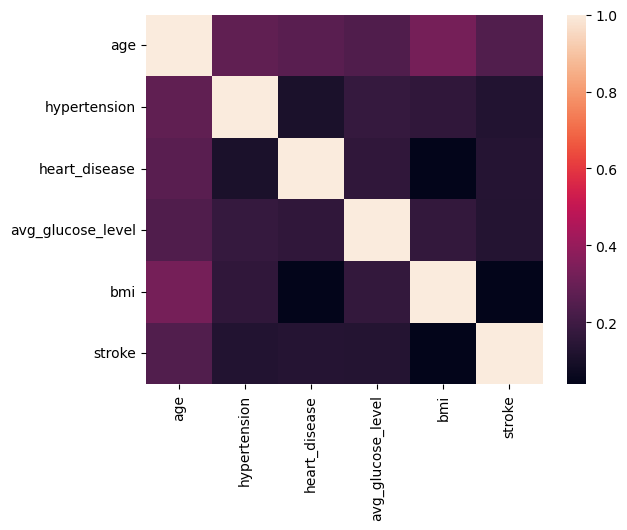

In [9]:
sns.heatmap(dataframe.corr())

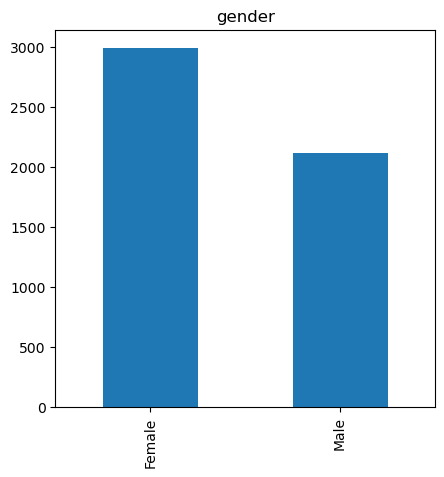

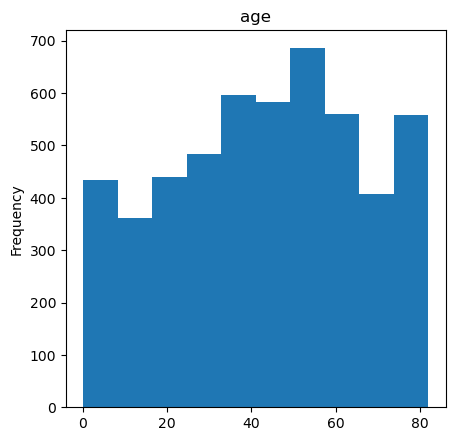

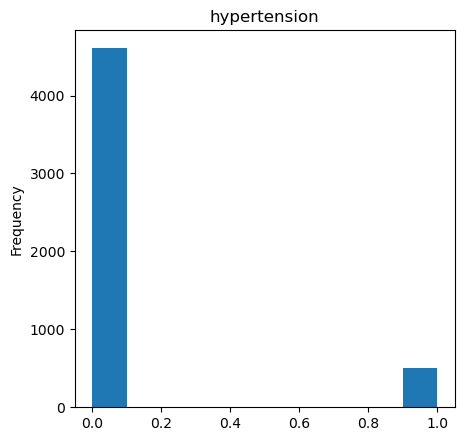

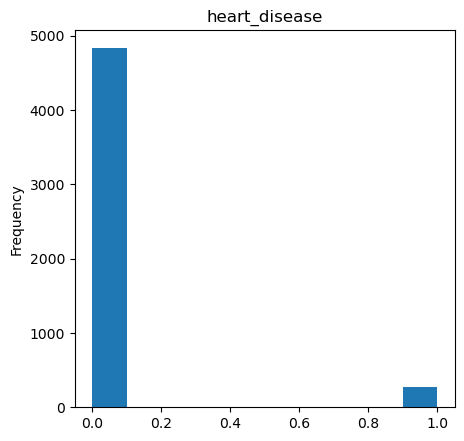

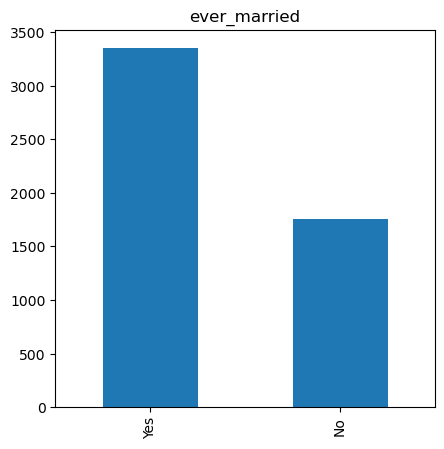

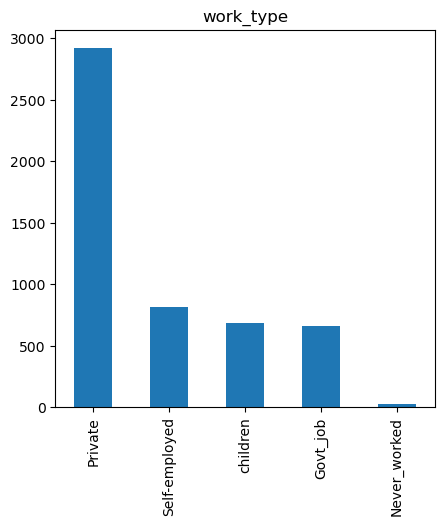

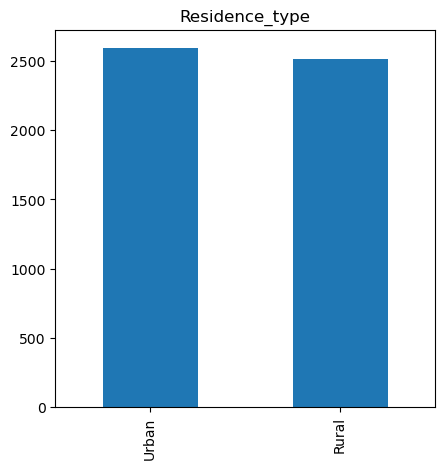

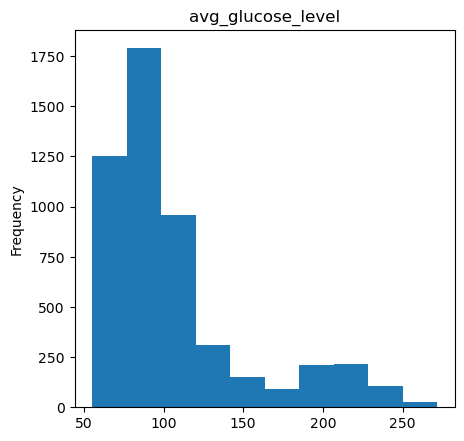

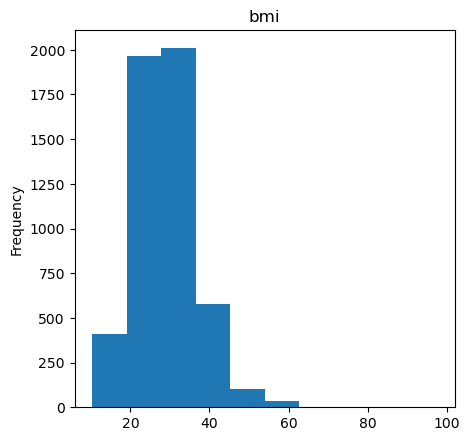

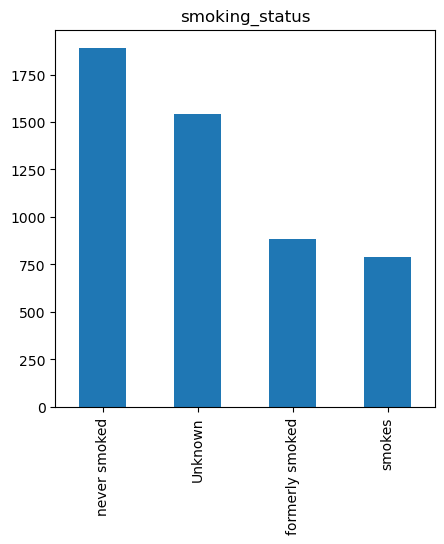

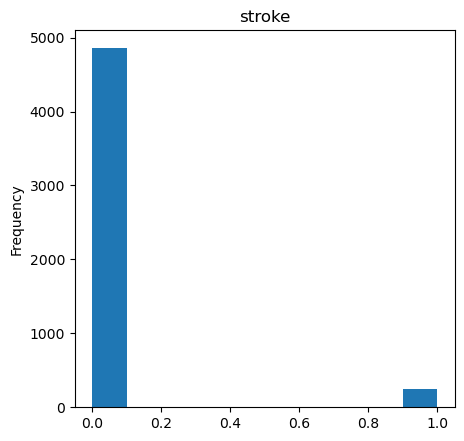

In [10]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
for column in dataframe:
    plt.figure(column, figsize = (4.9,4.9))
    plt.title(column)
    if is_numeric_dtype(dataframe[column]):
        dataframe[column].plot(kind = 'hist')
    elif is_string_dtype(dataframe[column]):
        dataframe[column].value_counts()[:10].plot(kind = 'bar')

In [11]:
num_list = []
cat_list = []

for column in dataframe:
 if is_numeric_dtype(dataframe[column]):
        num_list.append(column)
 elif is_string_dtype(dataframe[column]):
        cat_list.append(column)    

print('Numerical columns', num_list)
print('Categorical columns', cat_list)

Numerical columns ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
Categorical columns ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


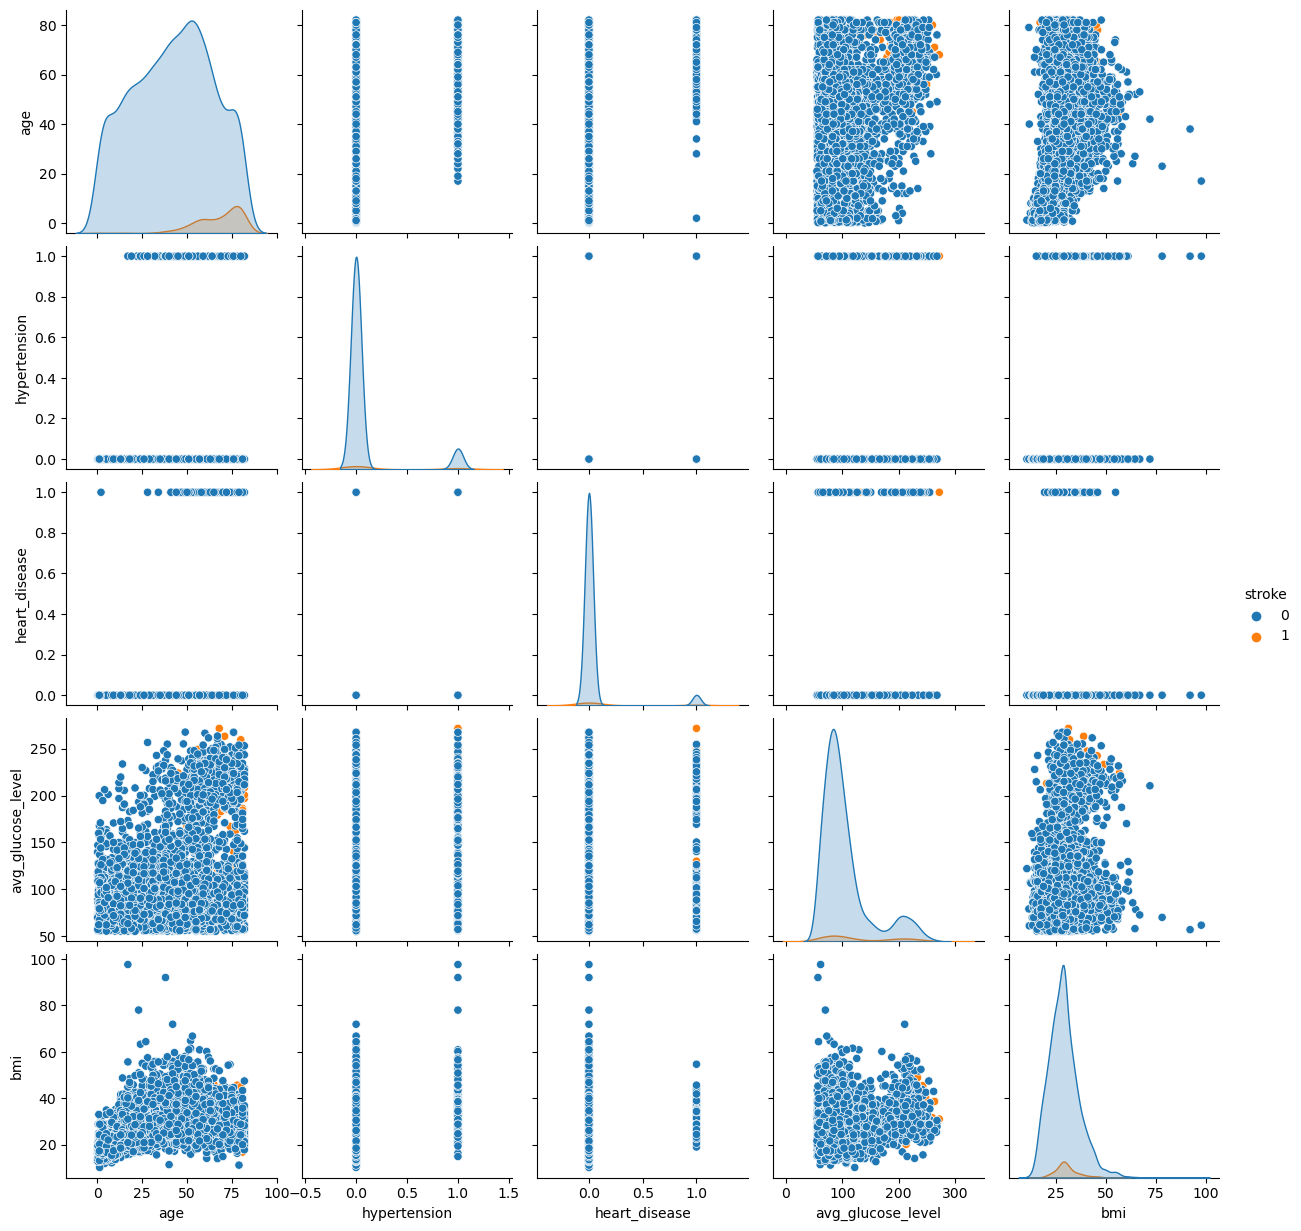

In [12]:
sns.pairplot(dataframe,height = 2.5, hue='stroke')

In [13]:
df=dataframe

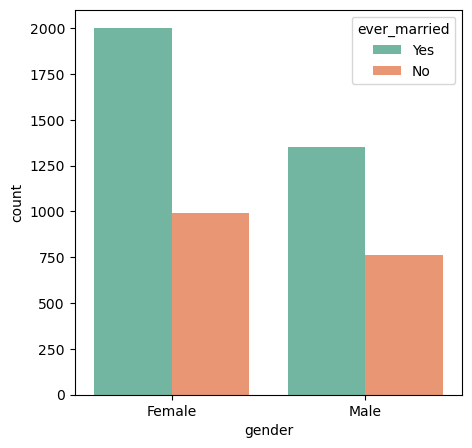

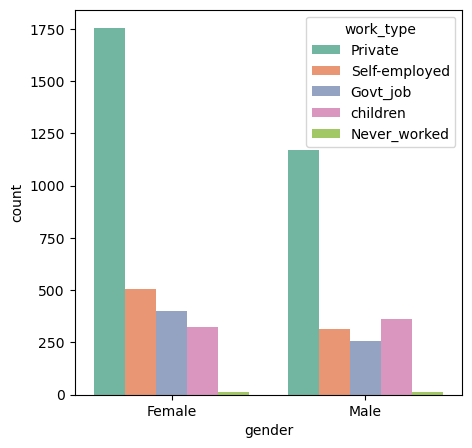

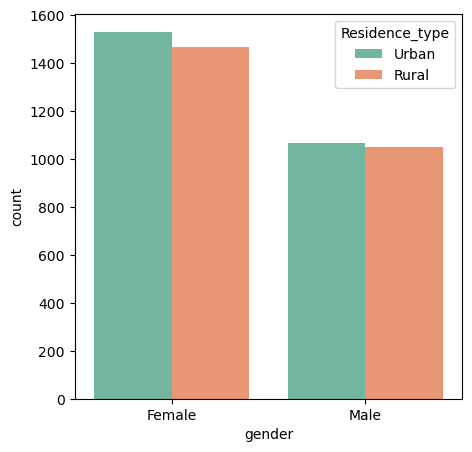

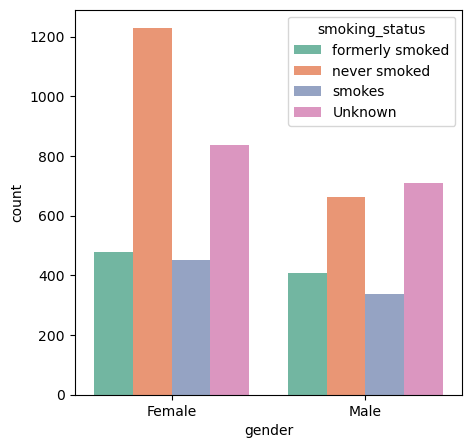

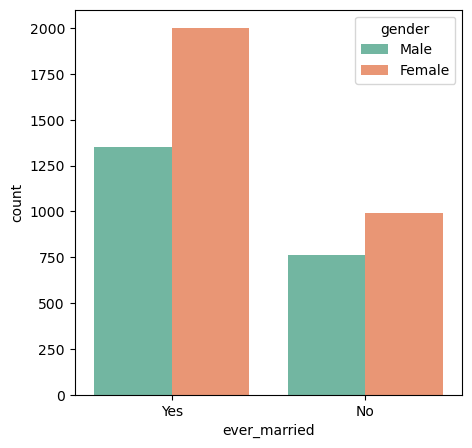

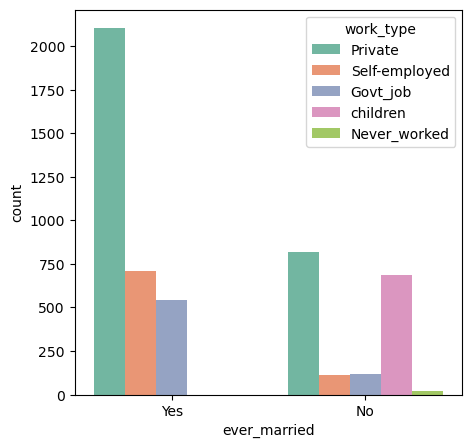

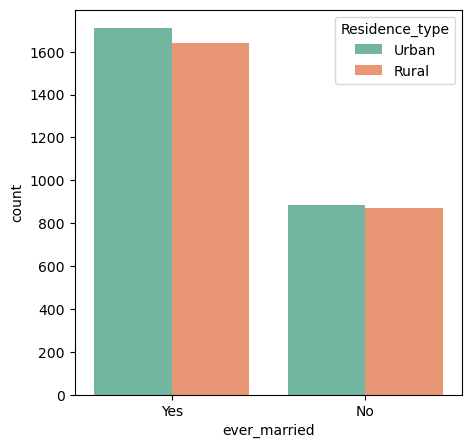

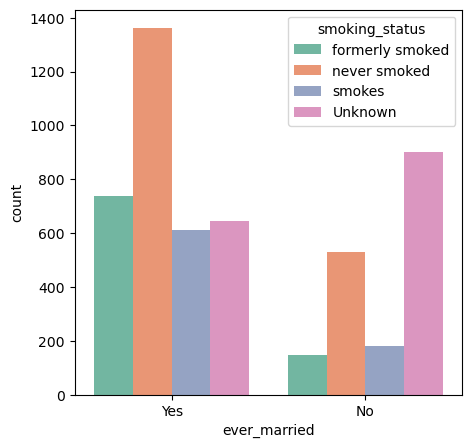

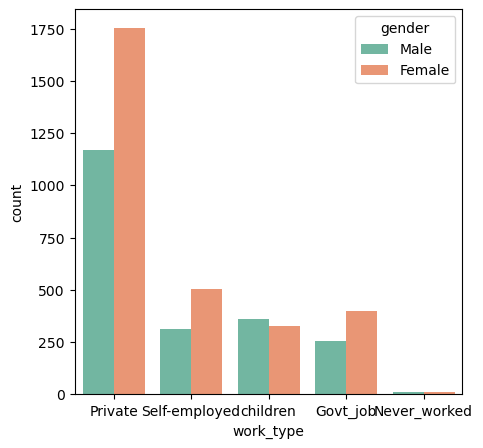

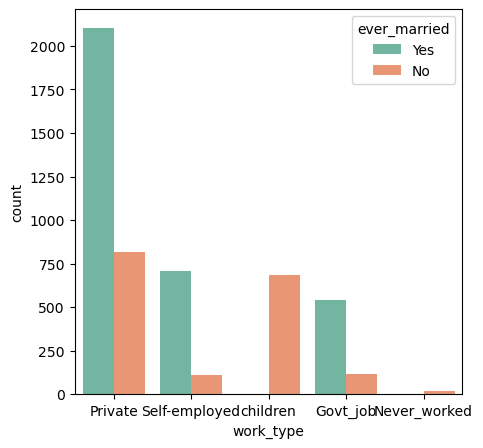

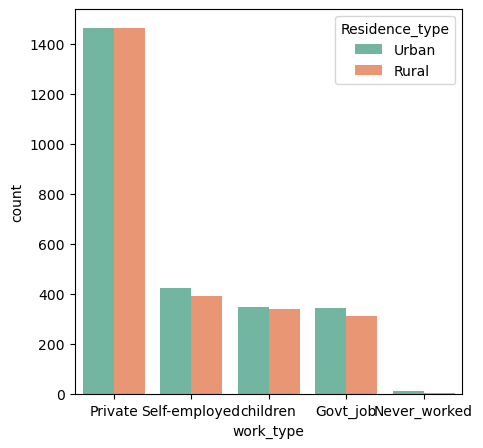

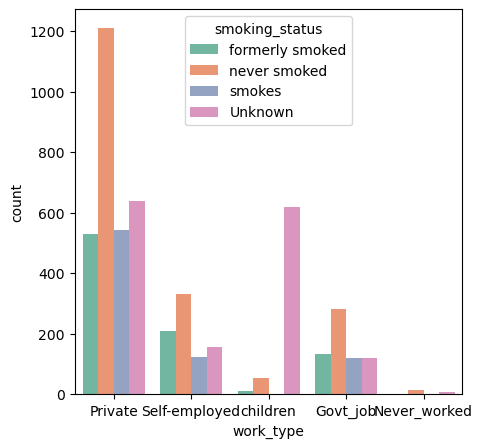

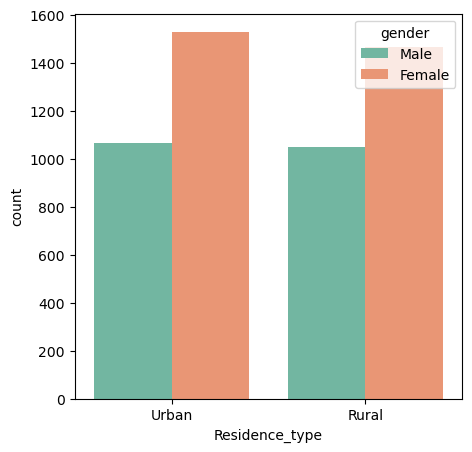

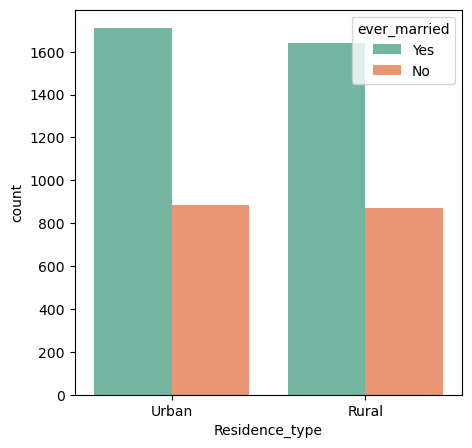

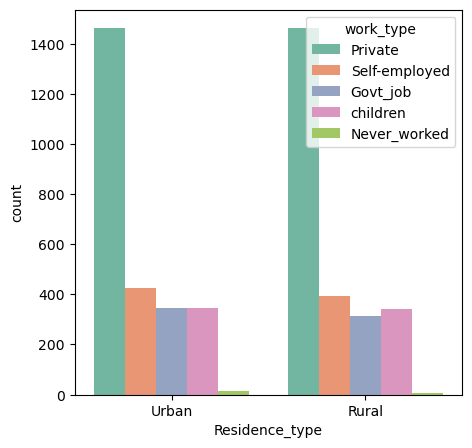

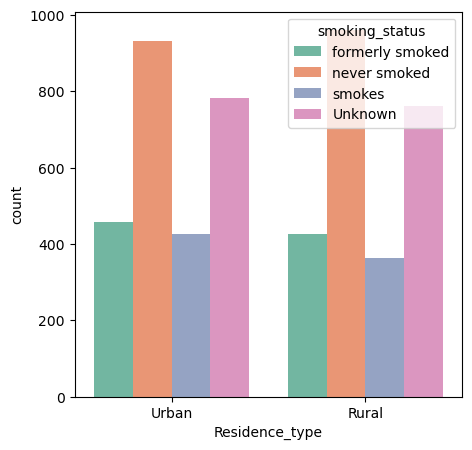

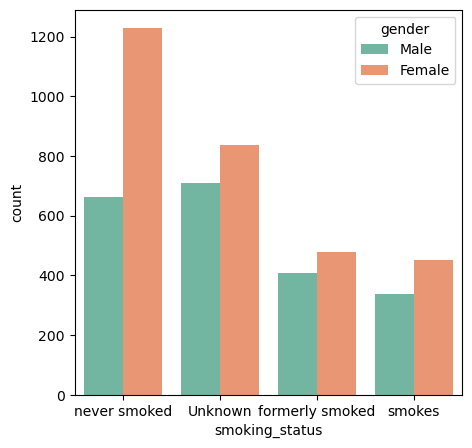

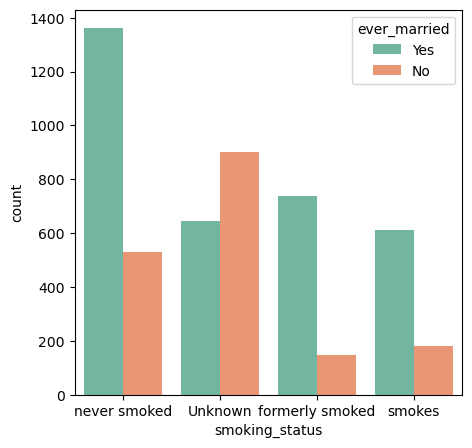

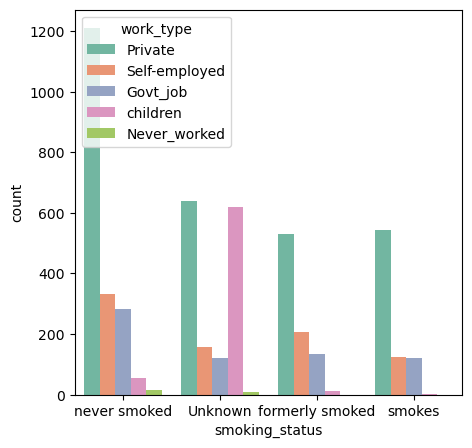

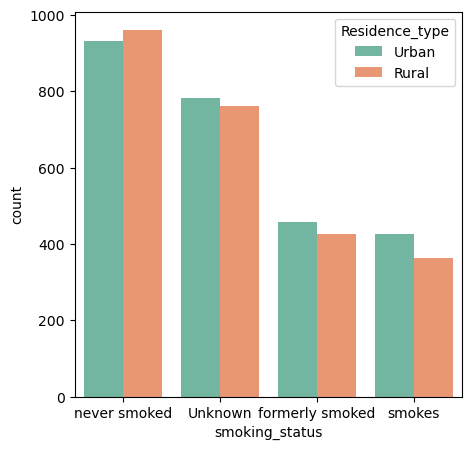

In [14]:
for i in range(0, len(cat_list)):
    primary_cat = cat_list[i]
    for j in range(0, len(cat_list)):
        secondary_cat = cat_list[j]
        if secondary_cat != primary_cat:
            plt.figure (figsize = (5,5))
            chart = sns.countplot(
                data = df,
                x= primary_cat, 
                hue= secondary_cat,
                palette = 'Set2',
                order=df[primary_cat].value_counts().iloc[:10].index #show only TOP10
              )

In [15]:
df_dummy = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
df_dummy

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [16]:
X = df_dummy.drop(['stroke'], axis=1)
y= df_dummy['stroke']
X.shape
y.shape




(5109,)